In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/march-machine-learning-mania-2024/Conferences.csv
/kaggle/input/march-machine-learning-mania-2024/sample_submission.csv
/kaggle/input/march-machine-learning-mania-2024/WNCAATourneyDetailedResults.csv
/kaggle/input/march-machine-learning-mania-2024/WRegularSeasonCompactResults.csv
/kaggle/input/march-machine-learning-mania-2024/MNCAATourneySeedRoundSlots.csv
/kaggle/input/march-machine-learning-mania-2024/MRegularSeasonDetailedResults.csv
/kaggle/input/march-machine-learning-mania-2024/MNCAATourneyCompactResults.csv
/kaggle/input/march-machine-learning-mania-2024/MGameCities.csv
/kaggle/input/march-machine-learning-mania-2024/WGameCities.csv
/kaggle/input/march-machine-learning-mania-2024/MSeasons.csv
/kaggle/input/march-machine-learning-mania-2024/WNCAATourneySlots.csv
/kaggle/input/march-machine-learning-mania-2024/MSecondaryTourneyTeams.csv
/kaggle/input/march-machine-learning-mania-2024/2024_tourney_seeds.csv
/kaggle/input/march-machine-learning-mania-2024/Cities.csv
/

In [2]:
# Data Section 1 - The Basics:
MTeams= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MTeams.csv')
WTeams= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/WTeams.csv')

MSeasons= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MSeasons.csv')
WSeasons= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/WSeasons.csv')

MNCAATourneySeeds= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MNCAATourneySeeds.csv')
WNCAATourneySeeds= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/WNCAATourneySeeds.csv')

# Data Section 2 - Team Box Scores
MRegularSeasonCompactResults= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MRegularSeasonCompactResults.csv')
WRegularSeasonCompactResults= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/WRegularSeasonCompactResults.csv')

MNCAATourneyCompactResults= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MNCAATourneyCompactResults.csv')
WNCAATourneyCompactResults= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/WNCAATourneyCompactResults.csv')

MRegularSeasonDetailedResults= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MRegularSeasonDetailedResults.csv')
WRegularSeasonDetailedResults= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/WRegularSeasonDetailedResults.csv')

MNCAATourneyDetailedResults= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MNCAATourneyDetailedResults.csv')
WNCAATourneyDetailedResults= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/WNCAATourneyDetailedResults.csv')

# Data Section 3 - Geography
Cities= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/Cities.csv')

MGameCities= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MGameCities.csv')
WGameCities= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/WGameCities.csv')

# Data Section 4 - Public Rankings
MMasseyOrdinals= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MMasseyOrdinals_thruSeason2024_day128.csv')

# Data Section 5 - Supplements
MTeamCoaches= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MTeamCoaches.csv')

Conferences= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/Conferences.csv')

MTeamConferences= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MTeamConferences.csv')
WTeamConferences= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/WTeamConferences.csv')

MConferenceTourneyGames= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MConferenceTourneyGames.csv')

MSecondaryTourneyTeams= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MSecondaryTourneyTeams.csv')

MSecondaryTourneyCompactResults= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MSecondaryTourneyCompactResults.csv')

MTeamSpellings= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MTeamSpellings.csv', encoding='ISO-8859-1')
WTeamSpellings= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/WTeamSpellings.csv', encoding='ISO-8859-1')

MNCAATourneySlots= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MNCAATourneySlots.csv')
WNCAATourneySlots= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/WNCAATourneySlots.csv')  

MNCAATourneySeedRoundSlots= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MNCAATourneySeedRoundSlots.csv')

# Data Section 6 - Others
tourney_seeds_2024= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/2024_tourney_seeds.csv')
# fivethirtyeight_ncaa_forecasts_2023= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/fivethirtyeight_ncaa_forecasts_2023.csv')
sample_submission= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/sample_submission.csv')


In [3]:
#MEN
# Split data: one row per game becomes two rows
MNCAATourneyCompactResults_teams = pd.DataFrame(columns=["Season", "DayNum", "TeamID", "Score_T", "OpposingTeamID","Score_O", "Loc", "NumOT", "Outcome"])

for index, row in MNCAATourneyCompactResults.iterrows():
    # Extract match information
    season = row["Season"]
    day_num = row["DayNum"]
    w_team_id = row["WTeamID"]
    w_score = row["WScore"]
    l_team_id = row["LTeamID"]
    l_score = row["LScore"]
    w_loc = row["WLoc"]
    num_ot = row["NumOT"]

    # Add a row of data to represent the winning match results
    winning_match_row = pd.DataFrame({
        "Season": [season],
        "DayNum": [day_num],
        "TeamID": [w_team_id],
        "Score_T": [w_score],
        "Score_O": [l_score],
        "OpposingTeamID": [l_team_id],
        "Loc": [w_loc],
        "NumOT": [num_ot],
        "Outcome": ["Win"]
    })
    MNCAATourneyCompactResults_teams = pd.concat([MNCAATourneyCompactResults_teams, winning_match_row], ignore_index=True)

    # Add a row of data to represent the result of the losing game
    losing_match_row = pd.DataFrame({
        "Season": [season],
        "DayNum": [day_num],
        "TeamID": [l_team_id],
        "Score_T": [l_score],
        "Score_O": [w_score],
        "OpposingTeamID": [w_team_id],
        "Loc": ["H" if w_loc == "A" else "A" if w_loc == "H" else "N"],
        "NumOT": [num_ot],
        "Outcome": ["Loss"]
    })
    MNCAATourneyCompactResults_teams = pd.concat([MNCAATourneyCompactResults_teams, losing_match_row], ignore_index=True)
    
MNCAATourneyCompactResults_teams


,Season,DayNum,TeamID,Score_T,OpposingTeamID,Score_O,Loc,NumOT,Outcome
0,1985,136,1116,63,1234,54,N,0,Win
1,1985,136,1234,54,1116,63,N,0,Loss
2,1985,136,1120,59,1345,58,N,0,Win
3,1985,136,1345,58,1120,59,N,0,Loss
4,1985,136,1207,68,1250,43,N,0,Win
...,...,...,...,...,...,...,...,...,...
4897,2023,152,1274,59,1163,72,N,0,Loss
4898,2023,152,1361,72,1194,71,N,0,Win
4899,2023,152,1194,71,1361,72,N,0,Loss
4900,2023,154,1163,76,1361,59,N,0,Win


In [4]:
#WOMEN
# Split data: one row per game becomes two rows
WNCAATourneyCompactResults_teams = pd.DataFrame(columns=["Season", "DayNum", "TeamID", "Score_T", "OpposingTeamID","Score_O", "Loc", "NumOT", "Outcome"])

for index, row in WNCAATourneyCompactResults.iterrows():
    # Extract match information
    season = row["Season"]
    day_num = row["DayNum"]
    w_team_id = row["WTeamID"]
    w_score = row["WScore"]
    l_team_id = row["LTeamID"]
    l_score = row["LScore"]
    w_loc = row["WLoc"]
    num_ot = row["NumOT"]

    # Add a row of data to represent the winning match results
    winning_match_row = pd.DataFrame({
        "Season": [season],
        "DayNum": [day_num],
        "TeamID": [w_team_id],
        "Score_T": [w_score],
        "Score_O": [l_score],
        "OpposingTeamID": [l_team_id],
        "Loc": [w_loc],
        "NumOT": [num_ot],
        "Outcome": ["Win"]
    })
    WNCAATourneyCompactResults_teams = pd.concat([WNCAATourneyCompactResults_teams, winning_match_row], ignore_index=True)

    # Add a row of data to represent the result of the losing game
    losing_match_row = pd.DataFrame({
        "Season": [season],
        "DayNum": [day_num],
        "TeamID": [l_team_id],
        "Score_T": [l_score],
        "Score_O": [w_score],
        "OpposingTeamID": [w_team_id],
        "Loc": ["H" if w_loc == "A" else "A" if w_loc == "H" else "N"],
        "NumOT": [num_ot],
        "Outcome": ["Loss"]
    })
    WNCAATourneyCompactResults_teams = pd.concat([WNCAATourneyCompactResults_teams, losing_match_row], ignore_index=True)
    
WNCAATourneyCompactResults_teams

,Season,DayNum,TeamID,Score_T,OpposingTeamID,Score_O,Loc,NumOT,Outcome
0,1998,137,3104,94,3422,46,H,0,Win
1,1998,137,3422,46,3104,94,A,0,Loss
2,1998,137,3112,75,3365,63,H,0,Win
3,1998,137,3365,63,3112,75,A,0,Loss
4,1998,137,3163,93,3193,52,H,0,Win
...,...,...,...,...,...,...,...,...,...
3161,2023,151,3376,73,3234,77,N,0,Loss
3162,2023,151,3261,79,3439,72,N,0,Win
3163,2023,151,3439,72,3261,79,N,0,Loss
3164,2023,153,3261,102,3234,85,N,0,Win


In [5]:
#MEN
MNCAATourneyCompactResults_teamseed = pd.merge(MNCAATourneyCompactResults_teams, MNCAATourneySeeds[['Season','TeamID','Seed']], left_on=['Season','TeamID'], right_on=['Season','TeamID'], how='left').rename(columns={'Seed':'Seed_T'})
MNCAATourneyCompactResults_teamseed

MNCAATourneyCompactResults_teamseeds = pd.merge(MNCAATourneyCompactResults_teamseed, MNCAATourneySeeds[['Season','TeamID','Seed']], left_on=['Season','OpposingTeamID'], right_on=['Season','TeamID'], how='left').rename(columns={'Seed':'Seed_O','TeamID_x':'TeamID'})
MNCAATourneyCompactResults_teamseeds.drop(columns=['TeamID_y'], inplace=True)
MNCAATourneyCompactResults_teamseeds

MNCAATourneyCompactResults_teamseeds['Rank_T'] = MNCAATourneyCompactResults_teamseeds['Seed_T'].str[1:3].astype(int)
MNCAATourneyCompactResults_teamseeds['Rank_O'] = MNCAATourneyCompactResults_teamseeds['Seed_O'].str[1:3].astype(int)

MNCAATourneyCompactResults_teamseeds['RankDiff'] = MNCAATourneyCompactResults_teamseeds['Rank_O'] - MNCAATourneyCompactResults_teamseeds['Rank_T']
MNCAATourneyCompactResults_teamseeds['ScoreDiff'] = MNCAATourneyCompactResults_teamseeds['Score_O'] - MNCAATourneyCompactResults_teamseeds['Score_T']


MNCAATourneyCompactResults_teamseeds.head()

,Season,DayNum,TeamID,Score_T,OpposingTeamID,Score_O,Loc,NumOT,Outcome,Seed_T,Seed_O,Rank_T,Rank_O,RankDiff,ScoreDiff
0,1985,136,1116,63,1234,54,N,0,Win,X09,X08,9,8,-1,-9
1,1985,136,1234,54,1116,63,N,0,Loss,X08,X09,8,9,1,9
2,1985,136,1120,59,1345,58,N,0,Win,Z11,Z06,11,6,-5,-1
3,1985,136,1345,58,1120,59,N,0,Loss,Z06,Z11,6,11,5,1
4,1985,136,1207,68,1250,43,N,0,Win,W01,W16,1,16,15,-25


In [6]:
team_ids = MNCAATourneyCompactResults_teamseeds['TeamID'].unique().tolist()
team_ids
team_info_list = []
for team_id in team_ids:
    team_data = MNCAATourneyCompactResults_teamseeds[MNCAATourneyCompactResults_teamseeds['TeamID'] == team_id].iloc[0]  # 选择每个团队的第一个条目
    team_info_list.append({'TeamID': team_id,
                           '1stD1Season': team_data['Season']})
team_1stD1Season_M = pd.DataFrame(team_info_list)
team_1stD1Season_M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   TeamID       306 non-null    int64
 1   1stD1Season  306 non-null    int64
dtypes: int64(2)
memory usage: 4.9 KB


In [7]:
MNCAATourneyCompactResults_merge = pd.merge(MNCAATourneyCompactResults_teamseeds, team_1stD1Season_M[['TeamID','1stD1Season']], left_on=['TeamID'], right_on=['TeamID'], how='left').rename(columns={'1stD1Season':'1stD1Season_T'})
MNCAATourneyCompactResults_merge = pd.merge(MNCAATourneyCompactResults_merge, team_1stD1Season_M[['TeamID','1stD1Season']], left_on=['OpposingTeamID'], right_on=['TeamID'], how='left').rename(columns={'1stD1Season':'1stD1Season_O','TeamID_x':'TeamID'})
MNCAATourneyCompactResults_merge.drop(columns=['TeamID_y'], inplace=True)
MNCAATourneyCompactResults_merge.head()

,Season,DayNum,TeamID,Score_T,OpposingTeamID,Score_O,Loc,NumOT,Outcome,Seed_T,Seed_O,Rank_T,Rank_O,RankDiff,ScoreDiff,1stD1Season_T,1stD1Season_O
0,1985,136,1116,63,1234,54,N,0,Win,X09,X08,9,8,-1,-9,1985,1985
1,1985,136,1234,54,1116,63,N,0,Loss,X08,X09,8,9,1,9,1985,1985
2,1985,136,1120,59,1345,58,N,0,Win,Z11,Z06,11,6,-5,-1,1985,1985
3,1985,136,1345,58,1120,59,N,0,Loss,Z06,Z11,6,11,5,1,1985,1985
4,1985,136,1207,68,1250,43,N,0,Win,W01,W16,1,16,15,-25,1985,1985


In [8]:
#WOMEN
WNCAATourneyCompactResults_teamseed = pd.merge(WNCAATourneyCompactResults_teams, WNCAATourneySeeds[['Season','TeamID','Seed']], left_on=['Season','TeamID'], right_on=['Season','TeamID'], how='left').rename(columns={'Seed':'Seed_T'})
WNCAATourneyCompactResults_teamseeds = pd.merge(WNCAATourneyCompactResults_teamseed, WNCAATourneySeeds[['Season','TeamID','Seed']], left_on=['Season','OpposingTeamID'], right_on=['Season','TeamID'], how='left').rename(columns={'Seed':'Seed_O','TeamID_x':'TeamID'})
WNCAATourneyCompactResults_teamseeds.drop(columns=['TeamID_y'], inplace=True)

WNCAATourneyCompactResults_teamseeds['Rank_T'] = WNCAATourneyCompactResults_teamseeds['Seed_T'].str[1:3].astype(int)
WNCAATourneyCompactResults_teamseeds['Rank_O'] = WNCAATourneyCompactResults_teamseeds['Seed_O'].str[1:3].astype(int)

WNCAATourneyCompactResults_teamseeds['RankDiff'] = WNCAATourneyCompactResults_teamseeds['Rank_O'] - WNCAATourneyCompactResults_teamseeds['Rank_T']
WNCAATourneyCompactResults_teamseeds['ScoreDiff'] = MNCAATourneyCompactResults_teamseeds['Score_O'] - MNCAATourneyCompactResults_teamseeds['Score_T']

WNCAATourneyCompactResults_teamseeds.head()

,Season,DayNum,TeamID,Score_T,OpposingTeamID,Score_O,Loc,NumOT,Outcome,Seed_T,Seed_O,Rank_T,Rank_O,RankDiff,ScoreDiff
0,1998,137,3104,94,3422,46,H,0,Win,X02,X15,2,15,13,-9
1,1998,137,3422,46,3104,94,A,0,Loss,X15,X02,15,2,-13,9
2,1998,137,3112,75,3365,63,H,0,Win,W03,W14,3,14,11,-1
3,1998,137,3365,63,3112,75,A,0,Loss,W14,W03,14,3,-11,1
4,1998,137,3163,93,3193,52,H,0,Win,W02,W15,2,15,13,-25


In [9]:
team_ids = WNCAATourneyCompactResults_teamseeds['TeamID'].unique().tolist()
team_info_list = []
for team_id in team_ids:
    team_data = WNCAATourneyCompactResults_teamseeds[WNCAATourneyCompactResults_teamseeds['TeamID'] == team_id].iloc[0]  # 选择每个团队的第一个条目
    team_info_list.append({'TeamID': team_id,
                           '1stD1Season': team_data['Season']})
team_1stD1Season_W = pd.DataFrame(team_info_list)
WNCAATourneyCompactResults_merge = pd.merge(WNCAATourneyCompactResults_teamseeds, team_1stD1Season_W[['TeamID','1stD1Season']], left_on=['TeamID'], right_on=['TeamID'], how='left').rename(columns={'1stD1Season':'1stD1Season_T'})
WNCAATourneyCompactResults_merge = pd.merge(WNCAATourneyCompactResults_merge, team_1stD1Season_W[['TeamID','1stD1Season']], left_on=['OpposingTeamID'], right_on=['TeamID'], how='left').rename(columns={'1stD1Season':'1stD1Season_O','TeamID_x':'TeamID'})
WNCAATourneyCompactResults_merge.drop(columns=['TeamID_y'], inplace=True)
WNCAATourneyCompactResults_merge.head()

,Season,DayNum,TeamID,Score_T,OpposingTeamID,Score_O,Loc,NumOT,Outcome,Seed_T,Seed_O,Rank_T,Rank_O,RankDiff,ScoreDiff,1stD1Season_T,1stD1Season_O
0,1998,137,3104,94,3422,46,H,0,Win,X02,X15,2,15,13,-9,1998,1998
1,1998,137,3422,46,3104,94,A,0,Loss,X15,X02,15,2,-13,9,1998,1998
2,1998,137,3112,75,3365,63,H,0,Win,W03,W14,3,14,11,-1,1998,1998
3,1998,137,3365,63,3112,75,A,0,Loss,W14,W03,14,3,-11,1,1998,1998
4,1998,137,3163,93,3193,52,H,0,Win,W02,W15,2,15,13,-25,1998,1998


In [10]:
MNCAATourneyCompactResults_teams = MNCAATourneyCompactResults_merge[(MNCAATourneyCompactResults_merge['Season']>=2010) & (MNCAATourneyCompactResults_merge['Season']<2024)]
MNCAATourneyCompactResults_teams.reset_index(drop=True).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Season          1734 non-null   object
 1   DayNum          1734 non-null   object
 2   TeamID          1734 non-null   object
 3   Score_T         1734 non-null   object
 4   OpposingTeamID  1734 non-null   object
 5   Score_O         1734 non-null   object
 6   Loc             1734 non-null   object
 7   NumOT           1734 non-null   object
 8   Outcome         1734 non-null   object
 9   Seed_T          1734 non-null   object
 10  Seed_O          1734 non-null   object
 11  Rank_T          1734 non-null   int64 
 12  Rank_O          1734 non-null   int64 
 13  RankDiff        1734 non-null   int64 
 14  ScoreDiff       1734 non-null   object
 15  1stD1Season_T   1734 non-null   int64 
 16  1stD1Season_O   1734 non-null   int64 
dtypes: int64(5), object(12)
memory usage: 230.4+ KB


In [11]:
WNCAATourneyCompactResults_teams = WNCAATourneyCompactResults_merge[(WNCAATourneyCompactResults_merge['Season']>=2010) & (WNCAATourneyCompactResults_merge['Season']<2024)]
WNCAATourneyCompactResults_teams.reset_index(drop=True).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Season          1654 non-null   object
 1   DayNum          1654 non-null   object
 2   TeamID          1654 non-null   object
 3   Score_T         1654 non-null   object
 4   OpposingTeamID  1654 non-null   object
 5   Score_O         1654 non-null   object
 6   Loc             1654 non-null   object
 7   NumOT           1654 non-null   object
 8   Outcome         1654 non-null   object
 9   Seed_T          1654 non-null   object
 10  Seed_O          1654 non-null   object
 11  Rank_T          1654 non-null   int64 
 12  Rank_O          1654 non-null   int64 
 13  RankDiff        1654 non-null   int64 
 14  ScoreDiff       1654 non-null   object
 15  1stD1Season_T   1654 non-null   int64 
 16  1stD1Season_O   1654 non-null   int64 
dtypes: int64(5), object(12)
memory usage: 219.8+ KB


In [12]:
#MEN
Mdf_Loc = MNCAATourneyCompactResults_teams.copy()
Mdf_Loc['Loc'] = Mdf_Loc['Loc'].replace({'H': 1, 'A': -1, 'N': 0})
Mdf_Loc.reset_index(drop=True).head()
#WOMEN
Wdf_Loc = WNCAATourneyCompactResults_teams.copy()
Wdf_Loc['Loc'] = Wdf_Loc['Loc'].replace({'H': 1, 'A': -1, 'N': 0})
Wdf_Loc.reset_index(drop=True).head()

/tmp/ipykernel_18/3716682691.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Mdf_Loc['Loc'] = Mdf_Loc['Loc'].replace({'H': 1, 'A': -1, 'N': 0})
/tmp/ipykernel_18/3716682691.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Wdf_Loc['Loc'] = Wdf_Loc['Loc'].replace({'H': 1, 'A': -1, 'N': 0})


,Season,DayNum,TeamID,Score_T,OpposingTeamID,Score_O,Loc,NumOT,Outcome,Seed_T,Seed_O,Rank_T,Rank_O,RankDiff,ScoreDiff,1stD1Season_T,1stD1Season_O
0,2010,138,3124,69,3201,55,0,0,Win,X04,X13,4,13,9,-8,2001,2008
1,2010,138,3201,55,3124,69,0,0,Loss,X13,X04,13,4,-9,8,2008,2001
2,2010,138,3173,67,3395,66,0,0,Win,X08,X09,8,9,1,-7,2010,2001
3,2010,138,3395,66,3173,67,0,0,Loss,X09,X08,9,8,-1,7,2001,2010
4,2010,138,3181,72,3214,37,1,0,Win,X02,X15,2,15,13,-3,1998,2000


In [13]:
df_WinAccount = MNCAATourneyCompactResults_teams.copy()

# Calculate the number of wins for each Team in history March Madness dataset
win_counts = df_WinAccount[df_WinAccount['Outcome'] == 'Win']['TeamID'].value_counts()

#Create a dictionary to map TeamID to the corresponding number of wins. If there is no win, the default is 0
win_counts_dict = dict(win_counts)
for team_id in df_WinAccount['TeamID'].unique():
    if team_id not in win_counts_dict:
        win_counts_dict[team_id] = 0

# Add 'WinAccount' column
df_WinAccount['WinAccount'] = df_WinAccount['TeamID'].map(win_counts_dict)
df_WinAccount['WinAccount'] = df_WinAccount['WinAccount'].fillna(0)

# Winning Rate in March Madness
# Calculate the number of times each team has participated in the game
team_appearances = df_WinAccount['TeamID'].value_counts() 

# Add the number of attendances for each game to the raw data
df_WinAccount['CompactAccount'] = df_WinAccount['TeamID'].map(team_appearances)
# Calculate each team's winning percentage when playing in March Madness
df_WinAccount['WinningRate'] = df_WinAccount['WinAccount']/df_WinAccount['CompactAccount']
df_WinAccount = df_WinAccount[['Season','DayNum','TeamID','CompactAccount','WinAccount','WinningRate']]
df_WinAccount.reset_index(drop=True).head()

,Season,DayNum,TeamID,CompactAccount,WinAccount,WinningRate
0,2010,134,1115,2,1,0.500000
1,2010,134,1457,3,0,0.000000
2,2010,136,1124,28,19,0.678571
3,2010,136,1358,1,0,0.000000
4,2010,136,1139,23,16,0.695652


In [14]:
#MEN
df_merge_M = pd.merge(Mdf_Loc,df_WinAccount[['Season','DayNum','TeamID',
                                             'CompactAccount','WinAccount','WinningRate'
                                            ]],left_on=['Season','DayNum','TeamID'],
                      right_on=['Season','DayNum','TeamID'],how='left')
df_merge_M = df_merge_M.rename(columns={'CompactAccount':'CompactAccount_T',
                                        'WinAccount':'WinAccount_T',
                                        'WinningRate':'WinningRate_T',
                                        'OpposingTeamID':'TeamID_O'
                                       })
df_merge_M = pd.merge(df_merge_M,df_WinAccount[['Season','DayNum','TeamID',
                                             'CompactAccount','WinAccount','WinningRate'
                                            ]],left_on=['Season','DayNum','TeamID_O'],
                      right_on=['Season','DayNum','TeamID'],how='left')
df_merge_M.drop(columns=['TeamID_y'], inplace=True)
df_merge_M = df_merge_M.rename(columns={'CompactAccount':'CompactAccount_O',
                                        'WinAccount':'WinAccount_O',
                                        'WinningRate':'WinningRate_O',
                                        'TeamID_x':'TeamID_T'
                                       })

df_merge_M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Season            1734 non-null   object 
 1   DayNum            1734 non-null   object 
 2   TeamID_T          1734 non-null   object 
 3   Score_T           1734 non-null   object 
 4   TeamID_O          1734 non-null   object 
 5   Score_O           1734 non-null   object 
 6   Loc               1734 non-null   int64  
 7   NumOT             1734 non-null   object 
 8   Outcome           1734 non-null   object 
 9   Seed_T            1734 non-null   object 
 10  Seed_O            1734 non-null   object 
 11  Rank_T            1734 non-null   int64  
 12  Rank_O            1734 non-null   int64  
 13  RankDiff          1734 non-null   int64  
 14  ScoreDiff         1734 non-null   object 
 15  1stD1Season_T     1734 non-null   int64  
 16  1stD1Season_O     1734 non-null   int64  


In [15]:
#WOMEN
Wdf_WinAccount = WNCAATourneyCompactResults_teams.copy()

# Calculate the number of wins for each Team in history March Madness dataset
Wwin_counts = Wdf_WinAccount[Wdf_WinAccount['Outcome'] == 'Win']['TeamID'].value_counts()

#Create a dictionary to map TeamID to the corresponding number of wins. If there is no win, the default is 0
win_counts_dict = dict(Wwin_counts)
for team_id in Wdf_WinAccount['TeamID'].unique():
    if team_id not in win_counts_dict:
        win_counts_dict[team_id] = 0

# Add 'WinAccount' column
Wdf_WinAccount['WinAccount'] = Wdf_WinAccount['TeamID'].map(win_counts_dict)
Wdf_WinAccount['WinAccount'] = Wdf_WinAccount['WinAccount'].fillna(0)

# Winning Rate in March Madness
# Calculate the number of times each team has participated in the game
Wteam_appearances = Wdf_WinAccount['TeamID'].value_counts() 

# Add the number of attendances for each game to the raw data
Wdf_WinAccount['CompactAccount'] = Wdf_WinAccount['TeamID'].map(Wteam_appearances)
# Calculate each team's winning percentage when playing in March Madness
Wdf_WinAccount['WinningRate'] = Wdf_WinAccount['WinAccount']/Wdf_WinAccount['CompactAccount']
Wdf_WinAccount = Wdf_WinAccount[['Season','DayNum','TeamID','CompactAccount','WinAccount','WinningRate']]
Wdf_WinAccount.reset_index(drop=True).head()

,Season,DayNum,TeamID,CompactAccount,WinAccount,WinningRate
0,2010,138,3124,51,40,0.784314
1,2010,138,3201,5,0,0.000000
2,2010,138,3173,15,6,0.400000
3,2010,138,3395,1,0,0.000000
4,2010,138,3181,28,19,0.678571


In [16]:
df_merge_W = pd.merge(Wdf_Loc,Wdf_WinAccount[['Season','DayNum','TeamID',
                                             'CompactAccount','WinAccount','WinningRate'
                                            ]],left_on=['Season','DayNum','TeamID'],
                      right_on=['Season','DayNum','TeamID'],how='left')
df_merge_W = df_merge_W.rename(columns={'CompactAccount':'CompactAccount_T',
                                        'WinAccount':'WinAccount_T',
                                        'WinningRate':'WinningRate_T',
                                        'OpposingTeamID':'TeamID_O'
                                       })
df_merge_W = pd.merge(df_merge_W,Wdf_WinAccount[['Season','DayNum','TeamID',
                                             'CompactAccount','WinAccount','WinningRate'
                                            ]],left_on=['Season','DayNum','TeamID_O'],
                      right_on=['Season','DayNum','TeamID'],how='left')
df_merge_W.drop(columns=['TeamID_y'], inplace=True)
df_merge_W = df_merge_W.rename(columns={'CompactAccount':'CompactAccount_O',
                                        'WinAccount':'WinAccount_O',
                                        'WinningRate':'WinningRate_O',
                                        'TeamID_x':'TeamID_T'
                                       })

df_merge_W.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Season            1654 non-null   object 
 1   DayNum            1654 non-null   object 
 2   TeamID_T          1654 non-null   object 
 3   Score_T           1654 non-null   object 
 4   TeamID_O          1654 non-null   object 
 5   Score_O           1654 non-null   object 
 6   Loc               1654 non-null   int64  
 7   NumOT             1654 non-null   object 
 8   Outcome           1654 non-null   object 
 9   Seed_T            1654 non-null   object 
 10  Seed_O            1654 non-null   object 
 11  Rank_T            1654 non-null   int64  
 12  Rank_O            1654 non-null   int64  
 13  RankDiff          1654 non-null   int64  
 14  ScoreDiff         1654 non-null   object 
 15  1stD1Season_T     1654 non-null   int64  
 16  1stD1Season_O     1654 non-null   int64  


In [17]:
#MEN
df_WandL_M = df_merge_M.copy()
df_WandL_M['Outcome'] = df_merge_M['Outcome'].map({'Win': 1, 'Loss': 0})
df_WandL_M.head()
features_M = ['Season',  'TeamID_T', 'TeamID_O', 
               'Rank_T', 'Rank_O', '1stD1Season_T','1stD1Season_O',
              'CompactAccount_T', 'WinAccount_T', 'WinningRate_T',
               'CompactAccount_O', 'WinAccount_O', 'WinningRate_O']
# Select target variable
Target_M = 'Outcome'
df_data_M = df_WandL_M[features_M + [Target_M]]
df_data_M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Season            1734 non-null   object 
 1   TeamID_T          1734 non-null   object 
 2   TeamID_O          1734 non-null   object 
 3   Rank_T            1734 non-null   int64  
 4   Rank_O            1734 non-null   int64  
 5   1stD1Season_T     1734 non-null   int64  
 6   1stD1Season_O     1734 non-null   int64  
 7   CompactAccount_T  1734 non-null   int64  
 8   WinAccount_T      1734 non-null   int64  
 9   WinningRate_T     1734 non-null   float64
 10  CompactAccount_O  1734 non-null   int64  
 11  WinAccount_O      1734 non-null   int64  
 12  WinningRate_O     1734 non-null   float64
 13  Outcome           1734 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 189.8+ KB


In [18]:
#WOMEN
Wdf_WandL = df_merge_W.copy()
Wdf_WandL['Outcome'] = df_merge_W['Outcome'].map({'Win': 1, 'Loss': 0})
Wdf_WandL
# Select and prepare features
features_W = ['Season',  'TeamID_T', 'TeamID_O', 
               'Rank_T', 'Rank_O', '1stD1Season_T','1stD1Season_O',
              'CompactAccount_T', 'WinAccount_T', 'WinningRate_T',
               'CompactAccount_O', 'WinAccount_O', 'WinningRate_O']
# Select target variable
Target_W = 'Outcome'
df_data_W = Wdf_WandL[features_W + [Target_W]]
df_data_W.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Season            1654 non-null   object 
 1   TeamID_T          1654 non-null   object 
 2   TeamID_O          1654 non-null   object 
 3   Rank_T            1654 non-null   int64  
 4   Rank_O            1654 non-null   int64  
 5   1stD1Season_T     1654 non-null   int64  
 6   1stD1Season_O     1654 non-null   int64  
 7   CompactAccount_T  1654 non-null   int64  
 8   WinAccount_T      1654 non-null   int64  
 9   WinningRate_T     1654 non-null   float64
 10  CompactAccount_O  1654 non-null   int64  
 11  WinAccount_O      1654 non-null   int64  
 12  WinningRate_O     1654 non-null   float64
 13  Outcome           1654 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 181.0+ KB


In [19]:
#MEN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training, validation, and testing sets
train_data = df_data_M[( df_data_M['Season'] <= 2020)]
val_data = df_data_M[(df_data_M['Season'] > 2020) & (df_data_M['Season'] < 2024)]
test_data = df_data_M[df_data_M['Season'] == 2023]

# Reset indices after splitting
train_data.reset_index(drop=True, inplace=True)
val_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

# Separate into features (X) and target variable (y) for each set
X_train_df = train_data[features_M]
y_train_df = train_data[Target_M]

X_test_df = test_data[features_M]

X_val_df = val_data[features_M]
y_val_df = val_data[Target_M]

# Display the shapes of the datasets
print("Training set shape:", X_train_df.shape)
print("Validation set shape:", X_val_df.shape)
print("Testing set shape:", X_test_df.shape)

Training set shape: (1334, 13)
Validation set shape: (400, 13)
Testing set shape: (134, 13)


In [20]:
#WOMEN
# Split the dataset into training, validation, and testing sets
Wtrain_data = df_data_W[( df_data_W['Season'] <= 2020)]
Wval_data = df_data_W[(df_data_W['Season'] > 2020) & (df_data_W['Season'] < 2024)]
Wtest_data = df_data_W[df_data_W['Season'] == 2023]

# Reset indices after splitting
Wtrain_data.reset_index(drop=True, inplace=True)
Wval_data.reset_index(drop=True, inplace=True)
Wtest_data.reset_index(drop=True, inplace=True)

# Separate into features (X) and target variable (y) for each set
X_train_Wdf = Wtrain_data[features_W]
y_train_Wdf = Wtrain_data[Target_W]

X_test_Wdf = Wtest_data[features_W]

X_val_Wdf = Wval_data[features_W]
y_val_Wdf = Wval_data[Target_W]

# Display the shapes of the datasets
print("Training set shape:", X_train_Wdf.shape)
print("Validation set shape:", X_val_Wdf.shape)
print("Testing set shape:", X_test_Wdf.shape)

Training set shape: (1260, 13)
Validation set shape: (394, 13)
Testing set shape: (134, 13)


Logistic Regression:

Men's data logistic regression accuracy: 0.7400
Confusion Matrix:
 [[148  52]
 [ 52 148]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74       200
           1       0.74      0.74      0.74       200

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.74      0.74      0.74       400

Cross-Validation Accuracy Scores: [0.79827089 0.7925072  0.80403458 0.73487032 0.75144509]
Mean CV Accuracy: 0.7762


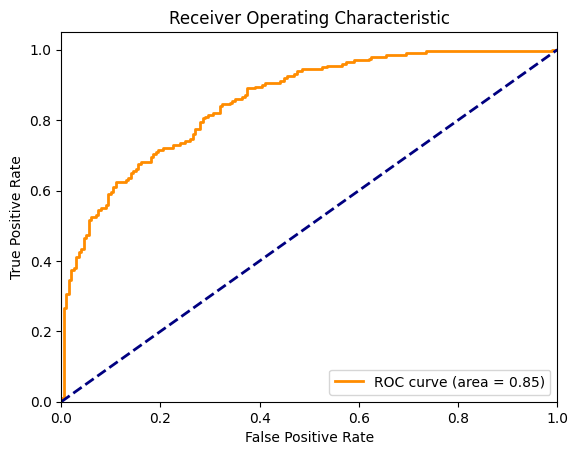

In [21]:
# MEN
# Assuming X_train_df and y_train_df are defined and preprocessed
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
import numpy as np

# Initialize the scaler
scaler = StandardScaler()

# Scale features
X_train_scaled = scaler.fit_transform(X_train_df)
X_val_scaled = scaler.transform(X_val_df)

# Fit the logistic regression model
model_men = LogisticRegression(max_iter=1000)
model_men.fit(X_train_scaled, y_train_df)

# Predict on the validation set
predictions_men = model_men.predict(X_val_scaled)

# Evaluate the model
accuracy_men = accuracy_score(y_val_df, predictions_men)
print(f"Men's data logistic regression accuracy: {accuracy_men:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_val_df, predictions_men)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_val_df, predictions_men)
print("Classification Report:\n", class_report)

# Corrected Cross-Validation using entire dataset
# Scale the entire dataset
df_data_M_scaled = scaler.fit_transform(df_data_M[features_M] )  
cv_accuracy = cross_val_score(model_men, df_data_M_scaled, df_data_M['Outcome'], cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_accuracy}")
print(f"Mean CV Accuracy: {cv_accuracy.mean():.4f}")

# ROC Curve and AUC
y_val_probs = model_men.predict_proba(X_val_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val_df, y_val_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Women's data logistic regression accuracy: 0.8223
Confusion Matrix:
 [[162  35]
 [ 35 162]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       197
           1       0.82      0.82      0.82       197

    accuracy                           0.82       394
   macro avg       0.82      0.82      0.82       394
weighted avg       0.82      0.82      0.82       394

Cross-Validation Accuracy Scores (Women): [0.81268882 0.86102719 0.78851964 0.83685801 0.80606061]
Mean CV Accuracy (Women): 0.8210


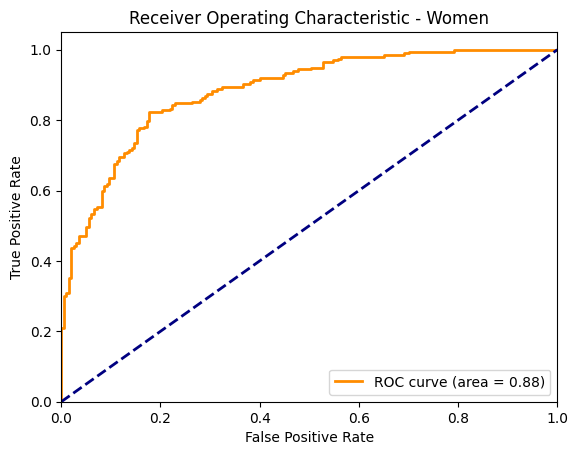

In [22]:
# WOMEN
# Initialize the scaler
scaler = StandardScaler()

# Scale features
X_train_W_scaled = scaler.fit_transform(X_train_Wdf)
X_val_W_scaled = scaler.transform(X_val_Wdf)

# Fit the logistic regression model
model_women = LogisticRegression(max_iter=1000)
model_women.fit(X_train_W_scaled, y_train_Wdf)

# Predict on the validation set
predictions_women = model_women.predict(X_val_W_scaled)

# Evaluate the model
accuracy_women = accuracy_score(y_val_Wdf, predictions_women)
print(f"Women's data logistic regression accuracy: {accuracy_women:.4f}")

# Confusion Matrix
conf_matrix_w = confusion_matrix(y_val_Wdf, predictions_women)
print("Confusion Matrix:\n", conf_matrix_w)

# Classification Report
class_report_w = classification_report(y_val_Wdf, predictions_women)
print("Classification Report:\n", class_report_w)

# Cross-Validation using entire dataset
# Scale the entire dataset
df_data_W_scaled = scaler.fit_transform(df_data_W[features_W])  
cv_accuracy_w = cross_val_score(model_women, df_data_W_scaled, df_data_W['Outcome'], cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores (Women): {cv_accuracy_w}")
print(f"Mean CV Accuracy (Women): {cv_accuracy_w.mean():.4f}")

# ROC Curve and AUC for Women
y_val_probs_w = model_women.predict_proba(X_val_W_scaled)[:, 1]
fpr_w, tpr_w, thresholds_w = roc_curve(y_val_Wdf, y_val_probs_w)
roc_auc_w = auc(fpr_w, tpr_w)

plt.figure()
plt.plot(fpr_w, tpr_w, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_w:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Women')
plt.legend(loc="lower right")
plt.show()

Predictions for each men and women teams using Logistic Regression:

In [23]:
# Standardize the testing datasets
X_test_scaled_men = scaler.transform(X_test_df)
X_test_scaled_women = scaler.transform(X_test_Wdf)

# Predict the probabilities for Men's teams
y_test_pred_probs_men = model_men.predict_proba(X_test_scaled_men)[:, 1]

# If you need binary predictions instead of probabilities
y_test_pred_men = model_men.predict(X_test_scaled_men)

# Predict the probabilities for Women's teams
y_test_pred_probs_women = model_women.predict_proba(X_test_scaled_women)[:, 1]

# need binary predictions instead of probabilities
y_test_pred_women = model_women.predict(X_test_scaled_women)


In [24]:
import pandas as pd

# Create a DataFrame for Men's team predictions
submission_men = pd.DataFrame({
    'TeamID': test_data['TeamID_T'],
    'Probabilities': y_test_pred_probs_men
})

# Similarly, for Women's team predictions
submission_women = pd.DataFrame({
    'TeamID': Wtest_data['TeamID_T'],
    'Probabilities': y_test_pred_probs_women
})

# Save to CSV files
submission_men.to_csv('submission_men.csv', index=False)
submission_women.to_csv('submission_women.csv', index=False)


Random Forest

Men's data Random Forest accuracy: 0.7500
Confusion Matrix (Men):
 [[152  48]
 [ 52 148]]
Classification Report (Men):
               precision    recall  f1-score   support

           0       0.75      0.76      0.75       200
           1       0.76      0.74      0.75       200

    accuracy                           0.75       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.75      0.75      0.75       400

Cross-Validation Accuracy Scores (Men): [0.75504323 0.72622478 0.78097983 0.69164265 0.71098266]
Mean CV Accuracy (Men): 0.7330


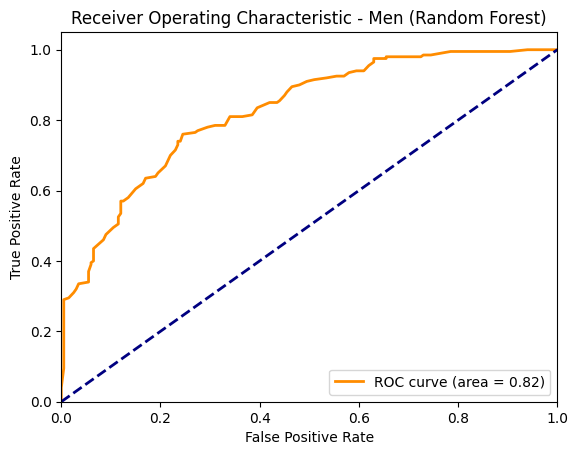

In [25]:
#MEN
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest classifier
model_rf_men = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
model_rf_men.fit(X_train_scaled, y_train_df)

# Predict on the validation set
predictions_rf_men = model_rf_men.predict(X_val_scaled)

# Evaluate the model
accuracy_rf_men = accuracy_score(y_val_df, predictions_rf_men)
print(f"Men's data Random Forest accuracy: {accuracy_rf_men:.4f}")

# Confusion Matrix
conf_matrix_rf_men = confusion_matrix(y_val_df, predictions_rf_men)
print("Confusion Matrix (Men):\n", conf_matrix_rf_men)

# Classification Report
print("Classification Report (Men):\n", classification_report(y_val_df, predictions_rf_men))

# Cross-Validation
cv_accuracy_rf_men = cross_val_score(model_rf_men, df_data_M_scaled, df_data_M['Outcome'], cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores (Men): {cv_accuracy_rf_men}")
print(f"Mean CV Accuracy (Men): {cv_accuracy_rf_men.mean():.4f}")

# ROC Curve and AUC for Men
y_val_probs_rf_men = model_rf_men.predict_proba(X_val_scaled)[:, 1]
fpr_rf_men, tpr_rf_men, _ = roc_curve(y_val_df, y_val_probs_rf_men)
roc_auc_rf_men = auc(fpr_rf_men, tpr_rf_men)

plt.figure()
plt.plot(fpr_rf_men, tpr_rf_men, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf_men:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Men (Random Forest)')
plt.legend(loc="lower right")
plt.show()

Women's data Random Forest accuracy: 0.7716
Confusion Matrix (Women):
 [[151  46]
 [ 44 153]]
Classification Report (Women):
               precision    recall  f1-score   support

           0       0.77      0.77      0.77       197
           1       0.77      0.78      0.77       197

    accuracy                           0.77       394
   macro avg       0.77      0.77      0.77       394
weighted avg       0.77      0.77      0.77       394

Cross-Validation Accuracy Scores (Women): [0.78549849 0.79456193 0.78851964 0.77945619 0.76969697]
Mean CV Accuracy (Women): 0.7835


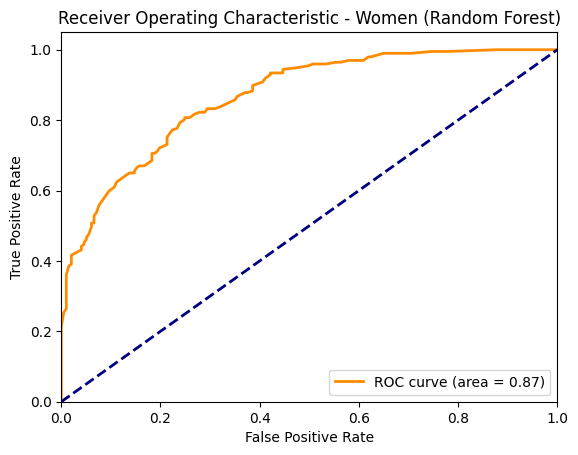

In [26]:
#WOMEN
# Initialize the Random Forest classifier for women's data
model_rf_women = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data for women
model_rf_women.fit(X_train_W_scaled, y_train_Wdf)

# Predict on the validation set for women
predictions_rf_women = model_rf_women.predict(X_val_W_scaled)

# Evaluate the model for women
accuracy_rf_women = accuracy_score(y_val_Wdf, predictions_rf_women)
print(f"Women's data Random Forest accuracy: {accuracy_rf_women:.4f}")

# Confusion Matrix for women
conf_matrix_rf_women = confusion_matrix(y_val_Wdf, predictions_rf_women)
print("Confusion Matrix (Women):\n", conf_matrix_rf_women)

# Classification Report for Women
print("Classification Report (Women):\n", classification_report(y_val_Wdf, predictions_rf_women))

# Cross-Validation for Women
cv_accuracy_rf_women = cross_val_score(model_rf_women, df_data_W_scaled, df_data_W['Outcome'], cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores (Women): {cv_accuracy_rf_women}")
print(f"Mean CV Accuracy (Women): {cv_accuracy_rf_women.mean():.4f}")

# ROC Curve and AUC for Women
y_val_probs_rf_women = model_rf_women.predict_proba(X_val_W_scaled)[:, 1]
fpr_rf_women, tpr_rf_women, _ = roc_curve(y_val_Wdf, y_val_probs_rf_women)
roc_auc_rf_women = auc(fpr_rf_women, tpr_rf_women)

plt.figure()
plt.plot(fpr_rf_women, tpr_rf_women, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf_women:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Women (Random Forest)')
plt.legend(loc="lower right")
plt.show()

Support Vector Machine (SVM):

Men's data SVM accuracy: 0.7100
Confusion Matrix (Men):
 [[142  58]
 [ 58 142]]
Classification Report (Men):
               precision    recall  f1-score   support

           0       0.71      0.71      0.71       200
           1       0.71      0.71      0.71       200

    accuracy                           0.71       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.71      0.71      0.71       400



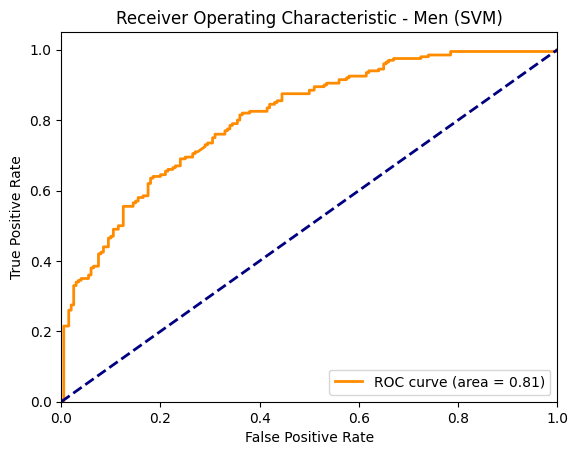

In [27]:
# MEN
from sklearn.svm import SVC
# Fit the SVM model on the training data for men
model_svm_men = SVC(probability=True, random_state=42)
model_svm_men.fit(X_train_scaled, y_train_df)

# Predict on the validation set for men
predictions_svm_men = model_svm_men.predict(X_val_scaled)

# Evaluate the model for men
accuracy_svm_men = accuracy_score(y_val_df, predictions_svm_men)
print(f"Men's data SVM accuracy: {accuracy_svm_men:.4f}")

# Confusion Matrix for men
conf_matrix_svm_men = confusion_matrix(y_val_df, predictions_svm_men)
print("Confusion Matrix (Men):\n", conf_matrix_svm_men)

# Classification Report for men
class_report_svm_men = classification_report(y_val_df, predictions_svm_men)
print("Classification Report (Men):\n", class_report_svm_men)

# ROC Curve and AUC for Men
y_val_probs_svm_men = model_svm_men.predict_proba(X_val_scaled)[:, 1]
fpr_svm_men, tpr_svm_men, _ = roc_curve(y_val_df, y_val_probs_svm_men)
roc_auc_svm_men = auc(fpr_svm_men, tpr_svm_men)

plt.figure()
plt.plot(fpr_svm_men, tpr_svm_men, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_svm_men:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Men (SVM)')
plt.legend(loc="lower right")
plt.show()

Women's data SVM accuracy: 0.8122
Confusion Matrix (Women):
 [[160  37]
 [ 37 160]]
Classification Report (Women):
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       197
           1       0.81      0.81      0.81       197

    accuracy                           0.81       394
   macro avg       0.81      0.81      0.81       394
weighted avg       0.81      0.81      0.81       394



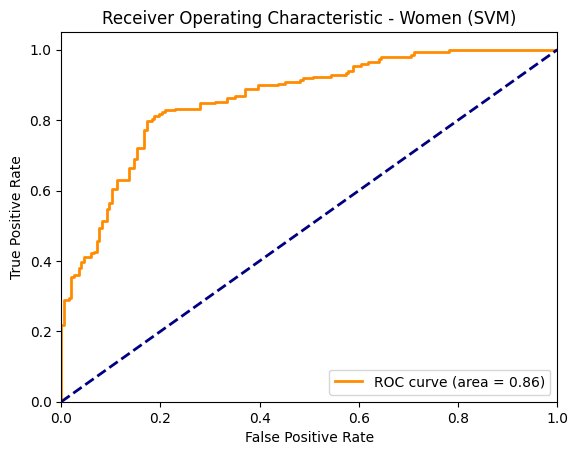

In [28]:
# WOMEN
# Fit the SVM model on the training data for women
model_svm_women = SVC(probability=True, random_state=42)
model_svm_women.fit(X_train_W_scaled, y_train_Wdf)

# Predict on the validation set for women
predictions_svm_women = model_svm_women.predict(X_val_W_scaled)

# Evaluate the model for women
accuracy_svm_women = accuracy_score(y_val_Wdf, predictions_svm_women)
print(f"Women's data SVM accuracy: {accuracy_svm_women:.4f}")

# Confusion Matrix for women
conf_matrix_svm_women = confusion_matrix(y_val_Wdf, predictions_svm_women)
print("Confusion Matrix (Women):\n", conf_matrix_svm_women)

# Classification Report for women
class_report_svm_women = classification_report(y_val_Wdf, predictions_svm_women)
print("Classification Report (Women):\n", class_report_svm_women)

# ROC Curve and AUC for Women
y_val_probs_svm_women = model_svm_women.predict_proba(X_val_W_scaled)[:, 1]
fpr_svm_women, tpr_svm_women, _ = roc_curve(y_val_Wdf, y_val_probs_svm_women)
roc_auc_svm_women = auc(fpr_svm_women, tpr_svm_women)

plt.figure()
plt.plot(fpr_svm_women, tpr_svm_women, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_svm_women:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Women (SVM)')
plt.legend(loc="lower right")
plt.show()

Draw three models in one graph:

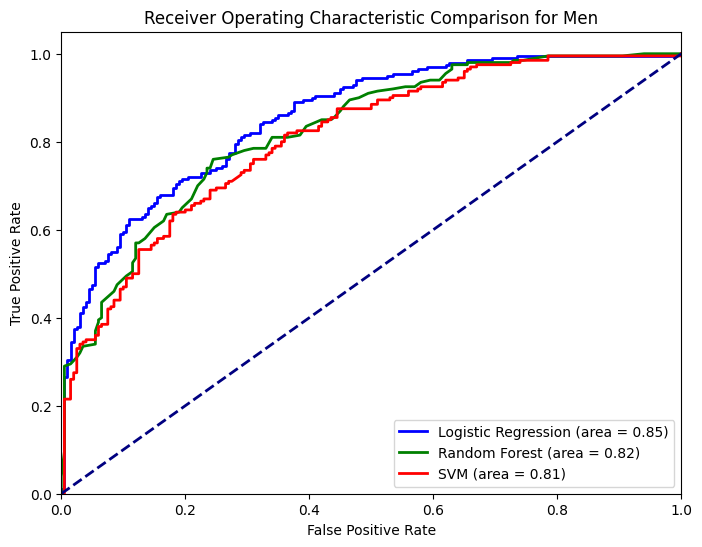

In [29]:
# Compute ROC curve and ROC area for each model
fpr_log, tpr_log, _ = roc_curve(y_val_df, y_val_probs)
roc_auc_log = auc(fpr_log, tpr_log)

fpr_rf, tpr_rf, _ = roc_curve(y_val_df, y_val_probs_rf_men)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_svm, tpr_svm, _ = roc_curve(y_val_df, y_val_probs_svm_men)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot all ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (area = {roc_auc_log:.2f})', color='blue', linestyle='-', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (area = {roc_auc_rf:.2f})', color='green', linestyle='-', linewidth=2)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (area = {roc_auc_svm:.2f})', color='red', linestyle='-', linewidth=2)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Comparison for Men')
plt.legend(loc="lower right")
plt.show()

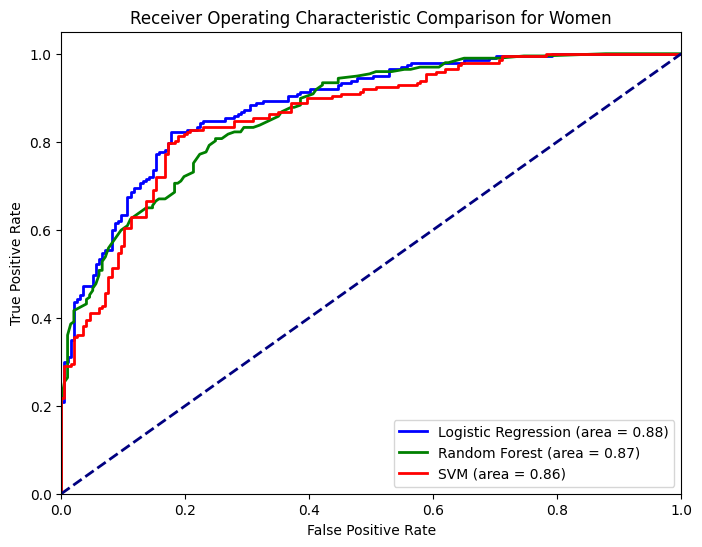

In [30]:
# Compute ROC curve and ROC area for each model for women
fpr_log_women, tpr_log_women, _ = roc_curve(y_val_Wdf, y_val_probs_w)
roc_auc_log_women = auc(fpr_log_women, tpr_log_women)

fpr_rf_women, tpr_rf_women, _ = roc_curve(y_val_Wdf, y_val_probs_rf_women)
roc_auc_rf_women = auc(fpr_rf_women, tpr_rf_women)

fpr_svm_women, tpr_svm_women, _ = roc_curve(y_val_Wdf, y_val_probs_svm_women)
roc_auc_svm_women = auc(fpr_svm_women, tpr_svm_women)

# Plot all ROC curves for women
plt.figure(figsize=(8, 6))
plt.plot(fpr_log_women, tpr_log_women, label=f'Logistic Regression (area = {roc_auc_log_women:.2f})', color='blue', linestyle='-', linewidth=2)
plt.plot(fpr_rf_women, tpr_rf_women, label=f'Random Forest (area = {roc_auc_rf_women:.2f})', color='green', linestyle='-', linewidth=2)
plt.plot(fpr_svm_women, tpr_svm_women, label=f'SVM (area = {roc_auc_svm_women:.2f})', color='red', linestyle='-', linewidth=2)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Comparison for Women')
plt.legend(loc="lower right")
plt.show()



RNN

In [31]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 30.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.0.5
    Uninstalling keras-3.0.5:
      Successfully uninstalled keras-3.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
Note: you may need to restart the kernel to use updated packages.


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
#MEN
# Split the dataset into features and target variable
X = df_data_M[features_M].values
y = df_data_M[Target_M].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the standardized data into training and validation sets
# Note: Ensure you have a train-validation split. Here's an example using 80% of data for training
split_index = int(0.8 * len(X_scaled))
X_train, X_val = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

# Reshape input to be 3D [samples, timesteps, features] for LSTM
X_train_3D = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val_3D = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))

# Now proceed with defining and training your LSTM model as before
model_M = Sequential()
model_M.add(LSTM(units=50, activation='sigmoid', input_shape=(X_train_3D.shape[1], X_train_3D.shape[2])))
model_M.add(Dense(units=1))
model_M.compile(optimizer='adam', loss='mean_squared_error')
model_M.fit(X_train_3D, y_train, epochs=10, batch_size=16, validation_data=(X_val_3D, y_val))


2024-04-12 00:05:10.203886: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-12 00:05:10.204036: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-12 00:05:10.357902: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/10
87/87 [==============================] - 3s 8ms/step - loss: 0.1963 - val_loss: 0.1760
Epoch 2/10
87/87 [==============================] - 0s 3ms/step - loss: 0.1649 - val_loss: 0.1695
Epoch 3/10
87/87 [==============================] - 0s 3ms/step - loss: 0.1595 - val_loss: 0.1662
Epoch 4/10
87/87 [==============================] - 0s 4ms/step - loss: 0.1570 - val_loss: 0.1647
Epoch 5/10
87/87 [==============================] - 0s 3ms/step - loss: 0.1550 - val_loss: 0.1656
Epoch 6/10
87/87 [==============================] - 0s 4ms/step - loss: 0.1554 - val_loss: 0.1648
Epoch 7/10
87/87 [==============================] - 0s 3ms/step - loss: 0.1562 - val_loss: 0.1641
Epoch 8/10
87/87 [==============================] - 0s 3ms/step - loss: 0.1550 - val_loss: 0.1648
Epoch 9/10
87/87 [==============================] - 0s 4ms/step - loss: 0.1549 - val_loss: 0.1642
Epoch 10/10
87/87 [==============================] - 0s 3ms/step - loss: 0.1553 - val_loss: 0.1641


11/11 [==============================] - 0s 2ms/step
Accuracy: 0.7809798270893372
Precision: 0.7869822485207101
Recall: 0.7687861271676301
F1 Score: 0.7777777777777779
ROC AUC: 0.8550594644874094
Confusion Matrix:
[[138  36]
 [ 40 133]]


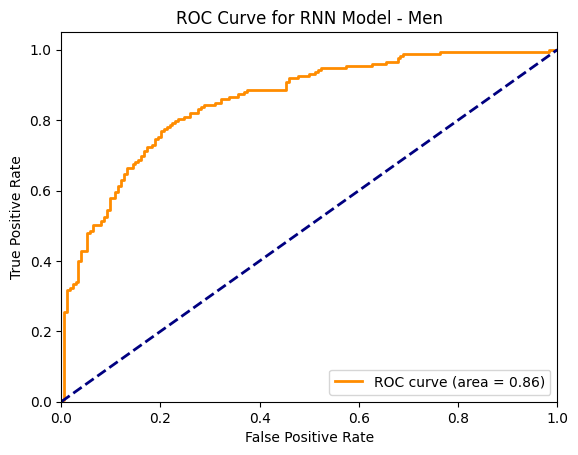

In [33]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_auc_score, roc_curve
# Predict the outcomes on the validation set
y_pred_probs = model_M.predict(X_val_3D)
y_pred = (y_pred_probs > 0.5).astype('int32').flatten()  # Apply a threshold to get binary classification

# Calculate the performance metrics
accuracy = accuracy_score(y_val, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_val, y_pred, average='binary')
conf_matrix = confusion_matrix(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_probs)

# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')
print(f'Confusion Matrix:\n{conf_matrix}')

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_probs)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RNN Model - Men')
plt.legend(loc="lower right")
plt.show()


In [34]:
# WOMEN
# Split the dataset into features and target variable
X_W = df_data_W[features_W].values
y_W = df_data_W[Target_W].values

# Standardize the features
scaler_W = StandardScaler()
X_scaled_W = scaler_W.fit_transform(X_W)

# Split the standardized data into training and validation sets
# Note: Ensure you have a train-validation split. Here's an example using 80% of data for training
split_index_W = int(0.8 * len(X_scaled_W))
X_train_W, X_val_W = X_scaled_W[:split_index_W], X_scaled_W[split_index_W:]
y_train_W, y_val_W = y_W[:split_index_W], y_W[split_index_W:]

# Reshape input to be 3D [samples, timesteps, features] for LSTM
X_train_W_3D = X_train_W.reshape((X_train_W.shape[0], 1, X_train_W.shape[1]))
X_val_W_3D = X_val_W.reshape((X_val_W.shape[0], 1, X_val_W.shape[1]))

# Create an RNN model for women
model_W = Sequential()
model_W.add(LSTM(units=50, activation='sigmoid', input_shape=(X_train_W_3D.shape[1], X_train_W_3D.shape[2])))
model_W.add(Dense(units=1))
model_W.compile(optimizer='adam', loss='mean_squared_error')

# Train the model for women
model_W.fit(X_train_W_3D, y_train_W, epochs=10, batch_size=16, validation_data=(X_val_W_3D, y_val_W))


Epoch 1/10
83/83 [==============================] - 2s 7ms/step - loss: 0.1609 - val_loss: 0.1631
Epoch 2/10
83/83 [==============================] - 0s 3ms/step - loss: 0.1323 - val_loss: 0.1619
Epoch 3/10
83/83 [==============================] - 0s 3ms/step - loss: 0.1304 - val_loss: 0.1595
Epoch 4/10
83/83 [==============================] - 0s 4ms/step - loss: 0.1284 - val_loss: 0.1609
Epoch 5/10
83/83 [==============================] - 0s 4ms/step - loss: 0.1287 - val_loss: 0.1578
Epoch 6/10
83/83 [==============================] - 0s 4ms/step - loss: 0.1277 - val_loss: 0.1585
Epoch 7/10
83/83 [==============================] - 0s 4ms/step - loss: 0.1269 - val_loss: 0.1566
Epoch 8/10
83/83 [==============================] - 0s 4ms/step - loss: 0.1276 - val_loss: 0.1566
Epoch 9/10
83/83 [==============================] - 0s 3ms/step - loss: 0.1262 - val_loss: 0.1568
Epoch 10/10
83/83 [==============================] - 0s 4ms/step - loss: 0.1262 - val_loss: 0.1563


11/11 [==============================] - 0s 2ms/step
Accuracy (Women): 0.7734138972809668
Precision (Women): 0.7556818181818182
Recall (Women): 0.806060606060606
F1 Score (Women): 0.780058651026393
ROC AUC (Women): 0.8591821832785689
Confusion Matrix (Women):
[[123  43]
 [ 32 133]]


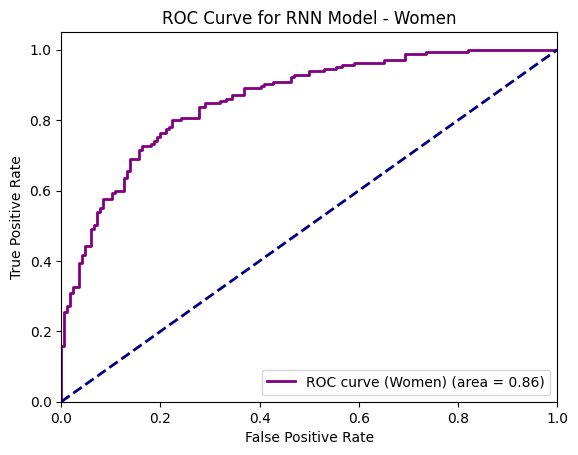

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Predict the outcomes on the validation set
y_pred_probs_W = model_W.predict(X_val_W_3D)
y_pred_W = (y_pred_probs_W > 0.5).astype('int32').flatten()  # Apply a threshold to get binary classification

# Calculate the performance metrics
accuracy_W = accuracy_score(y_val_W, y_pred_W)
precision_W, recall_W, f1_W, _ = precision_recall_fscore_support(y_val_W, y_pred_W, average='binary')
conf_matrix_W = confusion_matrix(y_val_W, y_pred_W)
roc_auc_W = roc_auc_score(y_val_W, y_pred_probs_W)

# Print the metrics
print(f'Accuracy (Women): {accuracy_W}')
print(f'Precision (Women): {precision_W}')
print(f'Recall (Women): {recall_W}')
print(f'F1 Score (Women): {f1_W}')
print(f'ROC AUC (Women): {roc_auc_W}')
print(f'Confusion Matrix (Women):\n{conf_matrix_W}')

# Plot the ROC curve for women
fpr_W, tpr_W, thresholds_W = roc_curve(y_val_W, y_pred_probs_W)
plt.figure()
plt.plot(fpr_W, tpr_W, label=f'ROC curve (Women) (area = {roc_auc_W:.2f})', color='purple', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RNN Model - Women')
plt.legend(loc="lower right")
plt.show()


In [36]:
def get_team_info(team_id):
    teaminfo = Team_combine[Team_combine['TeamID']==team_id].iloc[0]
    df_return = teaminfo[['TeamID','SeedRank','1stD1Season','WinAccount','CompactAccount','WinningRate']]
    return df_return

In [37]:
def input_data(team1_id, team2_id):

    team1_info = get_team_info(team1_id)
    team2_info = get_team_info(team2_id)
    team1_info_df = pd.DataFrame(team1_info).transpose()
    team2_info_df = pd.DataFrame(team2_info).transpose()
    merged_df = pd.concat([team1_info_df, team2_info_df])
    merged_df
    
    Inpu_data_M = pd.DataFrame()
    Inpu_data_M['TeamID_T'] = [team1_id] * 2  
    Inpu_data_M['TeamID_O'] = [team2_id] * 2 
    Inpu_data_M.loc[1, ['TeamID_T', 'TeamID_O']] = Inpu_data_M.loc[1, ['TeamID_O', 'TeamID_T']].values

    Inpu_data_M = pd.merge(Inpu_data_M, merged_df[['TeamID','SeedRank','1stD1Season','WinAccount',
                                                     'CompactAccount','WinningRate'
                                                   ]], left_on='TeamID_T', right_on='TeamID', how='left')
    Inpu_data_M = Inpu_data_M.rename(columns={"SeedRank":"Rank_T",
                                            '1stD1Season':'1stD1Season_T',
                                          'WinAccount':'WinAccount_T',
                                          'CompactAccount':'CompactAccount_T',
                                          'WinningRate':'WinningRate_T'})
    Inpu_data_M['Season'] = 2024
    Inpu_data_M = pd.merge(Inpu_data_M, merged_df[['TeamID','SeedRank','1stD1Season','WinAccount',
                                                     'CompactAccount','WinningRate'
                                                   ]], left_on='TeamID_O', right_on='TeamID', how='left')
    Inpu_data_M = Inpu_data_M.rename(columns={"SeedRank":"Rank_O",
                                            '1stD1Season':'1stD1Season_O',
                                          'WinAccount':'WinAccount_O',
                                          'CompactAccount':'CompactAccount_O',
                                          'WinningRate':'WinningRate_O'})
    Inpu_data_M = Inpu_data_M.drop(['TeamID_x','TeamID_y'], axis=1)
    return Inpu_data_M 

In [38]:
def predict_match_result(model, team1_id, team2_id):
    from sklearn.preprocessing import StandardScaler

    # Initialize an empty DataFrame to store results
    all_results = pd.DataFrame()

    # Initialize the scaler outside the loop
    scaler_predict = StandardScaler()
    Input_data = input_data(team1_id, team2_id)

    features_to_scale = ['Season','TeamID_T', 'Rank_T', '1stD1Season_T', 'WinAccount_T',
                         'CompactAccount_T', 'WinningRate_T', 'TeamID_O', 'Rank_O',
                         '1stD1Season_O', 'WinAccount_O', 'CompactAccount_O', 'WinningRate_O']

    # Fit the scaler on the original training data
    round_data = Input_data[features_to_scale]

    all_predictions = []

    for i in range(round_data.shape[0]):
        current_round_data = round_data.iloc[i:i+1].values
        current_round_data = np.array(current_round_data, dtype=np.float32)
        X_round = np.expand_dims(current_round_data, axis=0)

        predicted_score_difference = model.predict(X_round)
        all_predictions.append(predicted_score_difference[0][0])

    all_results = Input_data.copy()
    all_results['Pred_ScoreDiff'] = all_predictions
#     print(Input_data)

    # Initialize the new column with 0 for predicted result
    all_results['Pred_Result'] = 0
#     all_results
    # Compare 'Predicted_ScoreDifference' for each pair of rows
    for i in range(0, len(all_results), 2):
        if all_results.iloc[i]['Pred_ScoreDiff'] > all_results.iloc[i + 1]['Pred_ScoreDiff']:
            all_results.at[all_results.index[i], 'Pred_Result'] = 1
        else:
            all_results.at[all_results.index[i + 1], 'Pred_Result'] = 1

    return all_results[all_results['Pred_Result']==1]['TeamID_T']


In [39]:
def simulate_tournament(Model,teams_df):
    rounds = ['1st', '2nd', '3rd', '4th', '5th', 'Final']
    regions = ['W', 'X', 'Y', 'Z']
    
    winners_df = pd.DataFrame(columns=['Round', 'Region', 'Match', 'Winner', 'Seed'])

    for round_num, round_name in enumerate(rounds, start=1):
        print(f"{round_name} Round:")
        
        if round_num == 1:
            for region in regions:
                region_teams = teams_df[teams_df['Region'] == region].copy()
                matches = []
                matches.extend([(i, 17 - i) for i in range(1, 9)])
                for match_num, (seed1, seed2) in enumerate(matches, start=1):
                    team1 = teams_df[(teams_df['SeedRank'] == seed1)&(teams_df['Region'] == region)]['TeamID'].values[0]
                    team2 = teams_df[(teams_df['SeedRank'] == seed2)&(teams_df['Region'] == region)]['TeamID'].values[0]
                    winner = predict_match_result(Model, team1, team2).values[0]
                    winner = int(winner)
                    winner_seed = seed1 if winner == team1 else seed2

                    slot_num = seed1 if seed1 < seed2 else seed2

                    winners_df = pd.concat([winners_df, pd.DataFrame({'Round': [round_num], 'Region': [region], 'Match': [f"Match {match_num}"], 'Winner': [winner], 'Seed': [winner_seed],'SlotNum':[slot_num]})], ignore_index=True)
#                     print(f"{region} Match {match_num}: {seed1} vs {seed2} - Winner: {winner}, Seed: {winner_seed}")
#             print(winners_df)

        elif round_num == 2:
            for region in regions:
                region_winners = winners_df[winners_df['Region'] == region].copy()
                matches = []
                matches.extend([(region_winners.iloc[i]['Seed'], region_winners.iloc[7-i]['Seed']) for i in range(4)])
                for match_num, (seed1, seed2) in enumerate(matches, start=1):
                    team1 = winners_df[(winners_df['Seed'] == seed1)&(winners_df['Region'] == region)]['Winner'].values[0]
                    team2 = winners_df[(winners_df['Seed'] == seed2)&(winners_df['Region'] == region)]['Winner'].values[0]
                    winner = predict_match_result(Model, team1, team2).values[0]
                    winner = int(winner)
#                     winner_seed = seed1 if winner.values[0] == team1.values[0] else seed2
                    winner_seed = seed1 if winner == team1 else seed2
    
                    slot_num1 = winners_df[(winners_df['Round']==1)&(winners_df['Winner']==team1)]['SlotNum'].values[0]
                    slot_num2 = winners_df[(winners_df['Round']==1)&(winners_df['Winner']==team2)]['SlotNum'].values[0]
                    
                    slot_num_r2 = slot_num1 if slot_num1 < slot_num2 else slot_num2
        
                    winners_df = pd.concat([winners_df, pd.DataFrame({'Round': [round_num], 'Region': [region], 'Match': [f"Match {match_num}"], 'Winner': [winner], 'Seed': [winner_seed],'SlotNum':[slot_num_r2]})], ignore_index=True)
#                     print(f"{region} Match {match_num}: {seed1} vs {seed2} - Winner: {winner}, Seed: {winner_seed}")
#             print(winners_df)
                
        elif round_num == 3:
            for region in regions:
                previous_round_winners = winners_df[(winners_df['Region']==region)&(winners_df['Round']==2)].copy()
#                 print(previous_round_winners)
                matches = []
                matches.extend([(previous_round_winners.iloc[i]['Seed'], previous_round_winners.iloc[3-i]['Seed']) for i in range(2)])
                for match_num, (seed1, seed2) in enumerate(matches, start=1):
                    team1 = winners_df[(winners_df['Seed'] == seed1)&(winners_df['Region'] == region)]['Winner'].values[0]
                    team2 = winners_df[(winners_df['Seed'] == seed2)&(winners_df['Region'] == region)]['Winner'].values[0]
                    winner = predict_match_result(Model, team1, team2).values[0]
                    winner = int(winner)
                    winner_seed = seed1 if winner == team1 else seed2
                    
                    slot_num1 = winners_df[(winners_df['Round']==2)&(winners_df['Winner']==team1)]['SlotNum'].values[0]
                    slot_num2 = winners_df[(winners_df['Round']==2)&(winners_df['Winner']==team2)]['SlotNum'].values[0]
                    
                    slot_num_r3 = slot_num1 if slot_num1 < slot_num2 else slot_num2
                    
                    winners_df = pd.concat([winners_df, pd.DataFrame({'Round': [round_num], 'Region': [region], 'Match': [f"Match {match_num}"], 'Winner': [winner], 'Seed': [winner_seed],'SlotNum':[slot_num_r3]})], ignore_index=True)
#                     print(f"{region} Match {match_num}: {seed1} vs {seed2} - Winner: {winner}, Seed: {winner_seed}")
# #             print(winners_df)

        elif round_num == 4:
            for region in regions:
                previous_round_winners = winners_df[(winners_df['Region']==region)&(winners_df['Round']==3)].copy()
                matches = []
                matches.extend([(previous_round_winners.iloc[i]['Seed'], previous_round_winners.iloc[1-i]['Seed']) for i in range(1)])
#                 print(matches)
                for match_num, (seed1, seed2) in enumerate(matches, start=1):
                    team1 = previous_round_winners[(previous_round_winners['Seed'] == seed1)&(previous_round_winners['Region'] == region)]['Winner'].values[0]
                    team2 = previous_round_winners[(previous_round_winners['Seed'] == seed2)&(previous_round_winners['Region'] == region)]['Winner'].values[0]
                    winner = predict_match_result(Model, team1, team2).values[0]
                    winner = int(winner)
                    winner_seed = seed1 if winner == team1 else seed2
                    
                    slot_num1 = winners_df[(winners_df['Round']==3)&(winners_df['Winner']==team1)]['SlotNum'].values[0]
                    slot_num2 = winners_df[(winners_df['Round']==3)&(winners_df['Winner']==team2)]['SlotNum'].values[0]
                    
                    slot_num_r4 = slot_num1 if slot_num1 < slot_num2 else slot_num2
                    
                    winners_df = pd.concat([winners_df, pd.DataFrame({'Round': [round_num], 'Region': [region], 'Match': [f"Match {match_num}"], 'Winner': [winner], 'Seed': [winner_seed],'SlotNum':[slot_num_r4]})], ignore_index=True)
#                     print(f"{region} Match {match_num}: {seed1} vs {seed2} - Winner: {winner}, Seed: {winner_seed}")
#             print(winners_df)
                
        elif round_num == 5:
            previous_round_winners = winners_df[(winners_df['Round']==4)]
            W_winner = previous_round_winners[ (previous_round_winners['Region'] == 'W')]['Seed'].values[0]
            X_winner = previous_round_winners[ (previous_round_winners['Region'] == 'X')]['Seed'].values[0]
            Y_winner = previous_round_winners[ (previous_round_winners['Region'] == 'Y')]['Seed'].values[0]
            Z_winner = previous_round_winners[ (previous_round_winners['Region'] == 'Z')]['Seed'].values[0]
            matches = []
            matches.append((W_winner, X_winner))
            matches.append((Y_winner, Z_winner))
#             print(matches)
            i = 1
            for match_num, (seed1, seed2) in enumerate(matches, start=1):
                team1 = previous_round_winners[(previous_round_winners['Seed'] == seed1)& (previous_round_winners['Region'] == 'W')|(previous_round_winners['Region'] == 'Y')]['Winner'].values[0]
                team2 = previous_round_winners[(previous_round_winners['Seed'] == seed2)& (previous_round_winners['Region'] == 'X')|(previous_round_winners['Region'] == 'Z')]['Winner'].values[0]
                winner = predict_match_result(Model, team1, team2).values[0]
                winner = int(winner)
                winner_seed = seed1 if winner == team1 else seed2
                if i==1:
                    region='WX'
                else:
                    region='YZ'
                i += 1
                winners_df = pd.concat([winners_df, pd.DataFrame({'Round': [round_num], 'Region': [region], 'Match': [f"Match {match_num}"], 'Winner': [winner], 'Seed': [winner_seed]})], ignore_index=True)
#                 print(f"{region} Match {match_num}: {seed1} vs {seed2} - Winner: {winner}, Seed: {winner_seed}")
#             print(winners_df)            

        elif round_num == 6:
            previous_round_winners = winners_df[(winners_df['Round']==5)]
            C_winner = previous_round_winners['Winner'].values[0]
            H_winner = previous_round_winners['Winner'].values[1]
            matches = []
            matches.append((W_winner, Z_winner))
#             print(matches)
            for match_num, (seed1, seed2) in enumerate(matches, start=1):
                winner = predict_match_result(Model, team1, team2).values[0]
                winner = int(winner)
                winner_seed = seed1 if winner == team1 else seed2
                winners_df = pd.concat([winners_df, pd.DataFrame({'Round': [round_num], 'Region': 'CH', 'Match': [f"Match {match_num}"], 'Winner': [winner], 'Seed': [winner_seed]})], ignore_index=True)
#                 print(f"{region} Match {match_num}: {seed1} vs {seed2} - Winner: {winner}, Seed: {winner_seed}")
#             print("\n") 
#             print(winners_df) 

#         print("\n") 
    return winners_df


In [40]:

team_ids = df_merge_M['TeamID_T'].unique().tolist()
team_ids

team_info_list = []
for team_id in team_ids:
    team_data = df_merge_M[df_merge_M['TeamID_T'] == team_id].iloc[0]  # 选择每个团队的第一个条目
    team_info_list.append({'TeamID': team_id,
                           '1stD1Season': team_data['Season'],
                           'WinAccount': team_data['WinAccount_T'],
                           'CompactAccount': team_data['CompactAccount_T'],
                           'WinningRate': team_data['WinningRate_T']})

team_info_M = pd.DataFrame(team_info_list)

team_info_M.head()


,TeamID,1stD1Season,WinAccount,CompactAccount,WinningRate
0,1115,2010,1,2,0.500000
1,1457,2010,0,3,0.000000
2,1124,2010,19,28,0.678571
3,1358,2010,0,1,0.000000
4,1139,2010,16,23,0.695652


In [41]:
tourney_seeds_2024_M = tourney_seeds_2024[tourney_seeds_2024['Tournament']=='M']
seeds_2024_M = tourney_seeds_2024_M.copy()
seeds_2024_M['Region'] = seeds_2024_M['Seed'].str[0]
seeds_2024_M['SeedRank'] = seeds_2024_M['Seed'].str[1:].astype(int)
seeds_2024_M

,Tournament,Seed,TeamID,Region,SeedRank
0,M,W01,1163,W,1
1,M,W02,1235,W,2
2,M,W03,1228,W,3
3,M,W04,1120,W,4
4,M,W05,1361,W,5
...,...,...,...,...,...
59,M,Z12,1241,Z,12
60,M,Z13,1436,Z,13
61,M,Z14,1324,Z,14
62,M,Z15,1443,Z,15


In [42]:
Team_combine = pd.merge(seeds_2024_M,team_info_M[['TeamID','1stD1Season',
                                         'WinAccount','CompactAccount','WinningRate'
                                        ]], left_on=['TeamID'], right_on=['TeamID'], how='left')


teams_df_M = seeds_2024_M.copy()
winners_df_M = simulate_tournament(model_M,teams_df_M)
winners_df_M

1st Round:
1/1 [==============================] - 0s 21ms/step
2nd Round:
1/1 [==============================] - 0s 22ms/step
3rd Round:
1/1 [==============================] - 0s 21ms/step
4th Round:
1/1 [==============================] - 0s 21ms/step
5th Round:
1/1 [==============================] - 0s 22ms/step
Final Round:
1/1 [==============================] - 0s 21ms/step


,Round,Region,Match,Winner,Seed,SlotNum
0,1,W,Match 1,1391,16,1.0
1,1,W,Match 2,1235,2,2.0
2,1,W,Match 3,1228,3,3.0
3,1,W,Match 4,1120,4,4.0
4,1,W,Match 5,1412,12,5.0
...,...,...,...,...,...,...
58,4,Y,Match 1,1161,10,1.0
59,4,Z,Match 1,1222,1,1.0
60,5,WX,Match 1,1253,15,NaN
61,5,YZ,Match 2,1222,1,NaN


In [43]:
winners_df_M[31:65]

,Round,Region,Match,Winner,Seed,SlotNum
31,1,Z,Match 8,1401,9,8.0
32,2,W,Match 1,1194,8,1.0
33,2,W,Match 2,1235,2,2.0
34,2,W,Match 3,1182,11,3.0
35,2,W,Match 4,1120,4,4.0
36,2,X,Match 1,1277,9,1.0
37,2,X,Match 2,1253,15,2.0
38,2,X,Match 3,1155,6,3.0
39,2,X,Match 4,1213,12,4.0
40,2,Y,Match 1,1395,9,1.0


In [44]:

team_ids = df_merge_W['TeamID_T'].unique().tolist()
team_ids
team_info_list = []
for team_id in team_ids:
    team_data = df_merge_W[df_merge_W['TeamID_T'] == team_id].iloc[0]  # 选择每个团队的第一个条目
    team_info_list.append({'TeamID': team_id,
                           '1stD1Season': team_data['Season'],
                           'WinAccount': team_data['WinAccount_T'],
                           'CompactAccount': team_data['CompactAccount_T'],
                           'WinningRate': team_data['WinningRate_T']})

team_info_W = pd.DataFrame(team_info_list)
team_info_W.head()

tourney_seeds_2024_W = tourney_seeds_2024[tourney_seeds_2024['Tournament']=='W']
seeds_2024_W = tourney_seeds_2024_W.copy()
seeds_2024_W['Region'] = seeds_2024_W['Seed'].str[0]
seeds_2024_W['SeedRank'] = seeds_2024_W['Seed'].str[1:].astype(int)
seeds_2024_W.reset_index(drop=True, inplace=True)
seeds_2024_W.head()

,Tournament,Seed,TeamID,Region,SeedRank
0,W,W01,3376,W,1
1,W,W02,3323,W,2
2,W,W03,3333,W,3
3,W,W04,3231,W,4
4,W,W05,3328,W,5


In [45]:
Team_combine = pd.merge(seeds_2024_W,team_info_W[['TeamID','1stD1Season',
                                         'WinAccount','CompactAccount','WinningRate'
                                        ]], left_on=['TeamID'], right_on=['TeamID'], how='left')

teams_df_W = seeds_2024_W.copy()
winners_df_W = simulate_tournament(model_W,teams_df_W)
winners_df_W

1st Round:
1/1 [==============================] - 0s 21ms/step
2nd Round:
1/1 [==============================] - 0s 24ms/step
3rd Round:
1/1 [==============================] - 0s 20ms/step
4th Round:
1/1 [==============================] - 0s 21ms/step
5th Round:
1/1 [==============================] - 0s 23ms/step
Final Round:
1/1 [==============================] - 0s 22ms/step


,Round,Region,Match,Winner,Seed,SlotNum
0,1,W,Match 1,3342,16,1.0
1,1,W,Match 2,3245,15,2.0
2,1,W,Match 3,3186,14,3.0
3,1,W,Match 4,3193,13,4.0
4,1,W,Match 5,3195,12,5.0
...,...,...,...,...,...,...
58,4,Y,Match 1,3160,5,1.0
59,4,Z,Match 1,3112,11,1.0
60,5,WX,Match 1,3151,14,NaN
61,5,YZ,Match 2,3112,11,NaN


In [46]:
seeds_2024_M

,Tournament,Seed,TeamID,Region,SeedRank
0,M,W01,1163,W,1
1,M,W02,1235,W,2
2,M,W03,1228,W,3
3,M,W04,1120,W,4
4,M,W05,1361,W,5
...,...,...,...,...,...
59,M,Z12,1241,Z,12
60,M,Z13,1436,Z,13
61,M,Z14,1324,Z,14
62,M,Z15,1443,Z,15


In [47]:
winners_info_M = pd.merge(winners_df_M,seeds_2024_M[['TeamID','Seed']],left_on=['Winner'], right_on=['TeamID'], how='left')
winners_info_M = winners_info_M.rename(columns={'Seed_x':'Rank','Seed_y':'Seed'})

winners_info_M['SlotNum'] = winners_info_M['SlotNum'].astype(str).apply(lambda x: x.rstrip('0').rstrip('.'))
winners_info_M

,Round,Region,Match,Winner,Rank,SlotNum,TeamID,Seed
0,1,W,Match 1,1391,16,1,1391,W16
1,1,W,Match 2,1235,2,2,1235,W02
2,1,W,Match 3,1228,3,3,1228,W03
3,1,W,Match 4,1120,4,4,1120,W04
4,1,W,Match 5,1412,12,5,1412,W12
...,...,...,...,...,...,...,...,...
58,4,Y,Match 1,1161,10,1,1161,Y10
59,4,Z,Match 1,1222,1,1,1222,Z01
60,5,WX,Match 1,1253,15,nan,1253,X15
61,5,YZ,Match 2,1222,1,nan,1222,Z01


In [48]:
def transform_to_desired_format(df):
    transformed_df = pd.DataFrame(columns=['RowId', 'Tournament', 'Bracket', 'Slot', 'Team'])
    
    for index, row in df.iterrows():
        if row['Round'] <= 4:
            slot = f'R{row["Round"]}{row["Region"]}{str(row["SlotNum"])}'
            team = f'{row["Seed"]}'
        else:
            slot = f'R{row["Round"]}{row["Region"]}'
            team = f'{row["Seed"]}'
        
        transformed_df = pd.concat([transformed_df, pd.DataFrame({
            'RowId': [index],
            'Tournament': ['M'],
            'Bracket': [1],
            'Slot': [slot],
            'Team': [team]
        })], ignore_index=True)
    
    return transformed_df

submission_M = transform_to_desired_format(winners_info_M)
submission_M[32:]

,RowId,Tournament,Bracket,Slot,Team
32,32,M,1,R2W1,W08
33,33,M,1,R2W2,W02
34,34,M,1,R2W3,W11
35,35,M,1,R2W4,W04
36,36,M,1,R2X1,X09
37,37,M,1,R2X2,X15
38,38,M,1,R2X3,X06
39,39,M,1,R2X4,X12
40,40,M,1,R2Y1,Y09
41,41,M,1,R2Y2,Y10


In [49]:
winners_info_W = pd.merge(winners_df_W,seeds_2024_W[['TeamID','Seed']],left_on=['Winner'], right_on=['TeamID'], how='left')
winners_info_W = winners_info_W.rename(columns={'Seed_x':'Rank','Seed_y':'Seed'})
winners_info_W['SlotNum'] = winners_info_W['SlotNum'].astype(str).apply(lambda x: x.rstrip('0').rstrip('.'))

winners_info_W

,Round,Region,Match,Winner,Rank,SlotNum,TeamID,Seed
0,1,W,Match 1,3342,16,1,3342,W16
1,1,W,Match 2,3245,15,2,3245,W15
2,1,W,Match 3,3186,14,3,3186,W14
3,1,W,Match 4,3193,13,4,3193,W13
4,1,W,Match 5,3195,12,5,3195,W12
...,...,...,...,...,...,...,...,...
58,4,Y,Match 1,3160,5,1,3160,Y05
59,4,Z,Match 1,3112,11,1,3112,Z11
60,5,WX,Match 1,3151,14,nan,3151,X14
61,5,YZ,Match 2,3112,11,nan,3112,Z11


In [50]:
def transform_to_desired_format(df):
    transformed_df = pd.DataFrame(columns=['RowId', 'Tournament', 'Bracket', 'Slot', 'Team'])
    
    for index, row in df.iterrows():
        if row['Round'] <= 4:
            slot = f'R{row["Round"]}{row["Region"]}{str(row["SlotNum"])}'
            team = f'{row["Seed"]}'
        else:
            slot = f'R{row["Round"]}{row["Region"]}'
            team = f'{row["Seed"]}'
        
        transformed_df = pd.concat([transformed_df, pd.DataFrame({
            'RowId': [index],
            'Tournament': ['W'],
            'Bracket': [1],
            'Slot': [slot],
            'Team': [team]
        })], ignore_index=True)
    
    return transformed_df

submission_W = transform_to_desired_format(winners_info_W)
submission_W.reset_index(drop=True, inplace=True)
submission_W[32:65]

,RowId,Tournament,Bracket,Slot,Team
32,32,W,1,R2W1,W09
33,33,W,1,R2W2,W10
34,34,W,1,R2W3,W11
35,35,W,1,R2W4,W13
36,36,W,1,R2X1,X08
37,37,W,1,R2X2,X07
38,38,W,1,R2X3,X14
39,39,W,1,R2X4,X05
40,40,W,1,R2Y1,Y16
41,41,W,1,R2Y2,Y07


In [51]:
submission = pd.concat([submission_M, submission_W], ignore_index=True)
submission['RowId'] = range(len(submission))
print(submission)

     RowId Tournament Bracket  Slot Team
0        0          M       1  R1W1  W16
1        1          M       1  R1W2  W02
2        2          M       1  R1W3  W03
3        3          M       1  R1W4  W04
4        4          M       1  R1W5  W12
..     ...        ...     ...   ...  ...
121    121          W       1  R4Y1  Y05
122    122          W       1  R4Z1  Z11
123    123          W       1  R5WX  X14
124    124          W       1  R5YZ  Z11
125    125          W       1  R6CH  Z11

[126 rows x 5 columns]


In [52]:
submission.to_csv('submission_rnn.csv', index=False)
